I want to create some tracking using Templeosrs to measure my progress via competitors.

Ideas are:
1) Create a table that lets me see what eaech person is training on every week
2) EHP gained
3) daily,weekly,monthly
4)Maybe some projections

In [27]:
#Libraries

import urllib.request, urllib.parse, urllib.error
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np
pd.set_option('display.max_columns', None)  # Display all columns
%matplotlib inline  
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

In [28]:
url = 'https://templeosrs.com/api/skill_hiscores.php?skill=ehp&gamemode=1&count=50'
#Grab top 50

response_API = requests.get(url)
start_time = datetime.now()
end_time = datetime.now()
Duration = end_time-start_time
#print('Duration: {}'.format(end_time - start_time))
print(f'Duration: {Duration}')
data = response_API.text
#print(data)
js = json.loads(data)

Duration: 0:00:00


In [29]:
#Convert useful data to DF
players =  js["data"]["players"]  #type

#Convert dictinoary values into df
df = pd.DataFrame.from_dict(players,orient='index')

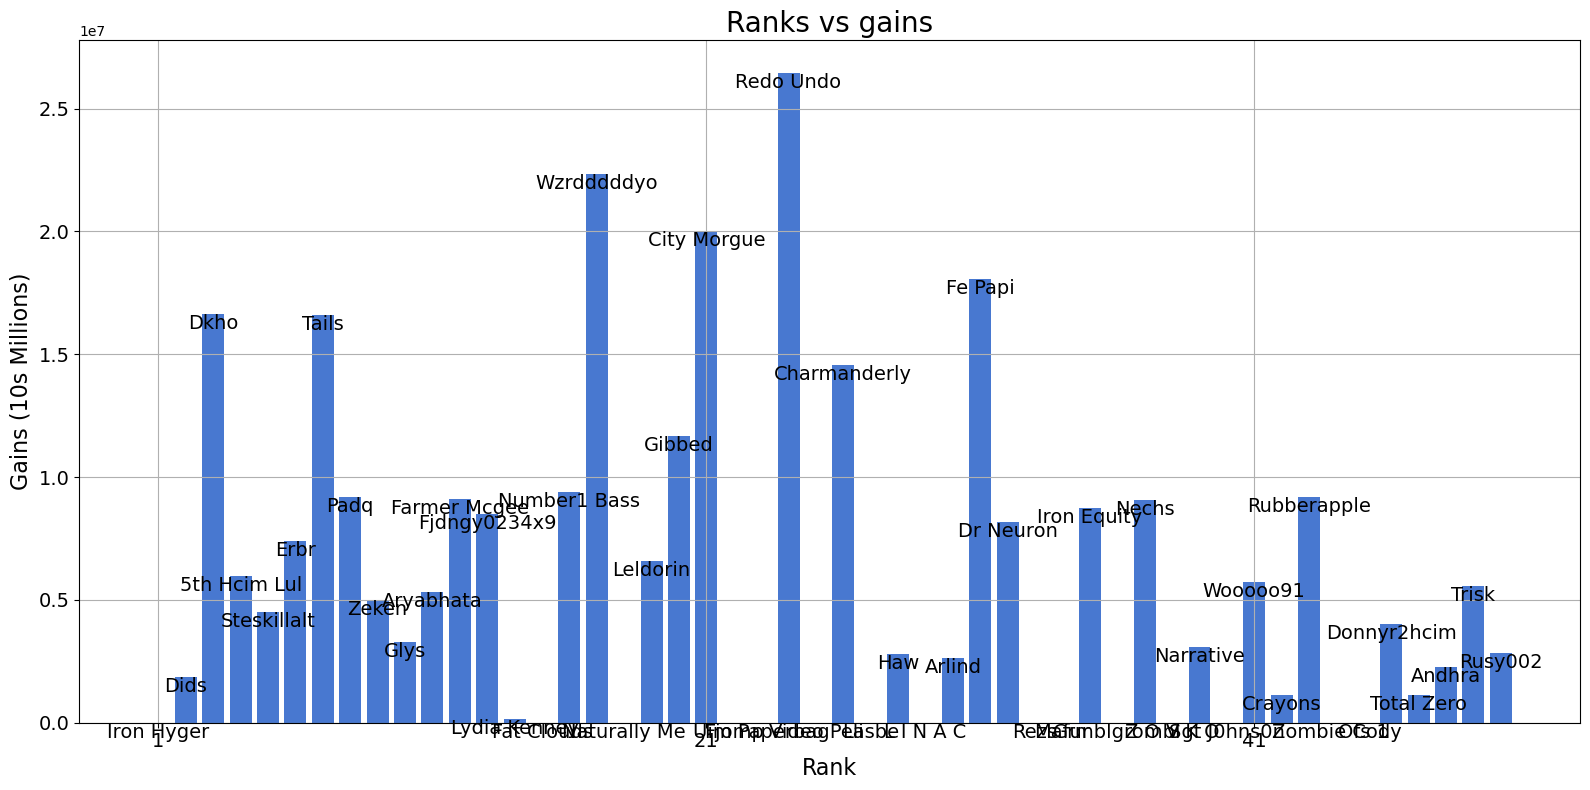

In [30]:
#Example  Chart


# Set the color palette
sns.set_palette('muted')
# (deep, muted, bright, pastel, dark, colorblind)

# Create the bar chart
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(df['rank'], df['gain'])
ax.set_title("Ranks vs gains", fontsize=20)
ax.set_xlabel("Rank", fontsize=16)
ax.set_ylabel("Gains (10s Millions)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)
''' The duel chart isnt really that good.
# Create the line chart on the secondary axis
ax2 = ax.twinx()
ax2.plot(df['rank'], df['gain'], color='red', linewidth=2, marker='o', label='Gain')
ax2.set_ylabel('Gains ', fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_yticklabels([]) # Hide the tick labels
ax2.legend(fontsize=14)
'''
# Set the x-axis ticks
x_ticks = np.arange(df['rank'].min(), df['rank'].max()+1, 20) # use np.arange() to split by whole numbers
ax.set_xticks(x_ticks)

# Add text labels
for i in range(len(df)):
    ax.text(df['rank'][i],df['gain'][i],df['username'][i],fontsize = 14, ha = 'center',va = 'top',wrap = 1 )

# Adjust the spacing
plt.tight_layout()


# Save the plot to a file
plt.savefig('plot.png')

In [31]:
#For Each top player, grab their weekly gains in each skill

df['username'] = df['username'].str.replace(' ', '_') #replace whitespace with underscore

for n,name in enumerate(df['username']):
 temple_url = 'https://templeosrs.com/api/player_gains.php?player=DKHo&time=604800&bosses=0'
    
    

In [32]:
##setup a empty DF
cols = ['Overall', 'Attack', 'Defence', 'Strength'
                            , 'Hitpoints', 'Ranged', 'Prayer', 'Magic'
                            , 'Cooking', 'Woodcutting', 'Fletching', 'Fishing'
                            , 'Firemaking', 'Crafting', 'Smithing', 'Mining'
                            , 'Herblore', 'Agility', 'Thieving', 'Slayer', 'Farming'
                            , 'Runecraft', 'Hunter', 'Construction', 'Ehp', 'Username','Date']

weekly_df =  pd.DataFrame(columns=cols)

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

for player in df['username']:
  temple_url = f'https://templeosrs.com/api/player_gains.php?player={player}&time=604800&bosses=0' 

  response_API2 = requests.get(temple_url)     
  data2 = response_API2.text
  js2 = json.loads(data2)
  #print(js2['data'])
  data_to_use= js2['data']
  data_to_use['Username'] = player
  new_row = pd.Series(data_to_use)
  #print(new_row)
  #print(new_row.append('Username': Player))
  weekly_df = weekly_df.append(new_row, ignore_index=True)
print(weekly_df)
  ##print(type(js2['data'].items()))
  ##for k,v in js2['data'].items():
    #print(k,v)
     #weekly_df['Username'] = 'DKHo'
   #  weekly_df = weekly_df.append(v,ignore_index = True)
    
#print(weekly_df)
warnings.simplefilter(action='default', category=FutureWarning)
        
    

     Overall   Attack  Defence Strength Hitpoints   Ranged   Prayer    Magic  \
0          0        0        0        0         0        0        0        0   
1    1874538        0        0        0         0        0        0        0   
2   16654299  2360608  2323993  1394781         0        0  2876984        0   
3    5988480    41420   682517   378386         0        0   332407        0   
4    4503512   495245   319962   514628         0  1029659   688712        0   
5    7389242        0        0        0         0        0        0        0   
6   16609135       25   205451        0         0        0  5550118        0   
7    9209002        0        0        0         0        0        0        0   
8    5016457        0   240738        0         0  1126739   142655   282732   
9    3303050   487852        0   942020         0        0    88273        0   
10   5304743        0  2158514        0         0        0   399776        0   
11   9116965        0        0        0 

In [33]:
#Make a pretty table

weekly_df.set_index('Username', inplace=True) ## run it once, then it errors.






In [34]:
weekly_df.columns

Index(['Overall', 'Attack', 'Defence', 'Strength', 'Hitpoints', 'Ranged',
       'Prayer', 'Magic', 'Cooking', 'Woodcutting', 'Fletching', 'Fishing',
       'Firemaking', 'Crafting', 'Smithing', 'Mining', 'Herblore', 'Agility',
       'Thieving', 'Slayer', 'Farming', 'Runecraft', 'Hunter', 'Construction',
       'Ehp', 'Date'],
      dtype='object')

## Plotly examples

In [35]:
import plotly.graph_objects as go
import pandas as pd


# Define the column widths
num_cols = len(weekly_df.columns)
column_width = [5.0 / num_cols] * num_cols

# Create the Plotly figure
fig = go.Figure(data=[go.Table(
    header=dict(values=list(weekly_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=weekly_df.values.T,
               fill_color='lavender',
               align='left'))
])

fig.show()

In [36]:
import plotly.express as px
fig = px.bar(top_25, x=weekly_df.index, y=weekly_df['Ehp'])
fig.show()

# Set the axis labels
fig.update_layout(
    xaxis_title='username',
    yaxis_title='ehp gained',
    title = 'Top 25 ehp gained'
)

# This value is not very good, as there are too many rows. Lets try a heatmap

In [37]:
import plotly.graph_objects as go
import pandas as pd


# Load your data into a pandas DataFrame called heatmap_data
# ...

top_25 = weekly_df.iloc[1:25,:].drop(['Overall','Date'],axis = 1)

fig = go.Figure()
# Create the heatmap trace
heatmap_trace = go.Heatmap(
    x=top_25.columns,
    y=top_25.index,
    z=top_25.values,
    colorscale='rainbow',
    zsmooth =False,
    )

max_vals = top_25.max(axis=1).tolist()
for i in range(len(top_25.columns)):
    for j in range(len(top_25.columns)):
        if top_25.iloc[i,j] == max_vals[i] or top_25.iloc[i,j] == max_vals[j]:
            fig.add_annotation(x=top_25.columns[j], y=top_25.columns[i], text=round(top_25.iloc[i,j], 2),
                               font=dict(color='white', size=12), showarrow=False)

# Create the figure object and add the trace
fig = go.Figure(data=[heatmap_trace])

# Set the axis labels
fig.update_layout(
    xaxis_title='variables',
    yaxis_title='username',
    title = 'Top 25 gains by skill'
)

# Show the figure


fig.show()
weekly_df['Ehp']


Username
Iron_Hyger            0
Dids            14.6305
Dkho            57.4438
5th_Hcim_Lul    36.9552
Steskillalt      8.7958
Erbr            18.0409
Tails            65.813
Padq            22.4527
Zeken           11.5955
Glys            16.8688
Aryabhata       12.9257
Farmer_Mcgee    59.7796
Fjdngy0234x9    44.2155
Lydia_Kenney     1.0871
Fat_Clouds            0
Number1_Bass    21.5527
Wzrdddddyo      52.7437
Naturally_Me     0.0251
Leldorin        32.4508
Gibbed          20.7937
City_Morgue     34.7294
Fjomp                 0
Uim_Paperbag          0
Redo_Undo       52.7066
Video_Peli            0
Charmanderly    95.0631
Lasbe                 0
Haw             20.5539
L_I_N_A_C             0
Arlind           7.7483
Fe_Papi         30.0569
Dr_Neuron        34.021
Rezs                  0
Mafur                 0
Iron_Equity     19.0577
Grmblgrombl           0
Nechs            31.606
Z_O_V_K_O             0
Narrative       16.3765
Sgt_J0hns0n           0
Wooooo91        23.7766
Crayons

In [38]:
top_25.max(axis = 1)
len(top_25.columns)

24

In [39]:
top_25.shape


(24, 24)

In [40]:
pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.2
anaconda-navigator==1.10.0
anyio @ file:///C:/ci/anyio_1644463701441/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569878360/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
astroid @ file:///C:/b/abs_d4lg3_taxn/croot/astroid_1676904351456/work
astropy @ file:///C:/ci/astropy_1657719688889/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_1671782804377/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754